# Import Packages and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline

# MetaData

In [2]:
train_data = pd.read_csv('./Data/train.csv')
test_data = pd.read_csv('./Data/test.csv')

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
train_data.describe(include=['number'])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
test_data.describe(include=['number'])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [7]:
train_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [8]:
test_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


In [10]:
columns_missing = train_data.columns[train_data.isnull().any()].tolist()
total = train_data[columns_missing].isnull().sum()
percent = (total / train_data.shape[0])
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values('Total', ascending=False)
missing_data

,Total,Percent
CryoSleep,217,0.024963
ShoppingMall,208,0.023927
VIP,203,0.023352
HomePlanet,201,0.023122
Name,200,0.023007
Cabin,199,0.022892
VRDeck,188,0.021627
FoodCourt,183,0.021051
Spa,183,0.021051
Destination,182,0.020936


In [11]:
columns_missing = test_data.columns[test_data.isnull().any()].tolist()
total = test_data[columns_missing].isnull().sum()
percent = (total / test_data.shape[0])
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values('Total', ascending=False)
missing_data

,Total,Percent
FoodCourt,106,0.024784
Spa,101,0.023615
Cabin,100,0.023381
ShoppingMall,98,0.022913
Name,94,0.021978
CryoSleep,93,0.021744
VIP,93,0.021744
Destination,92,0.021510
Age,91,0.021277
HomePlanet,87,0.020341


# Univariate Analysis

## Numeric Features

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

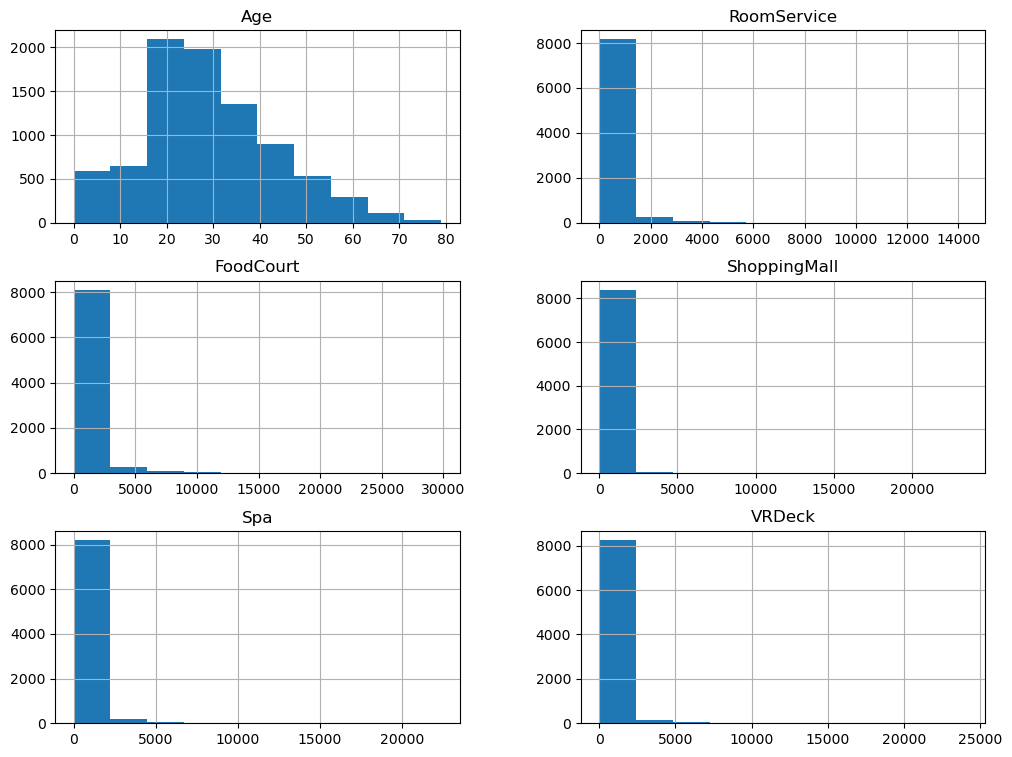

In [14]:
train_data.select_dtypes(include='number').hist(figsize=(12, 9))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

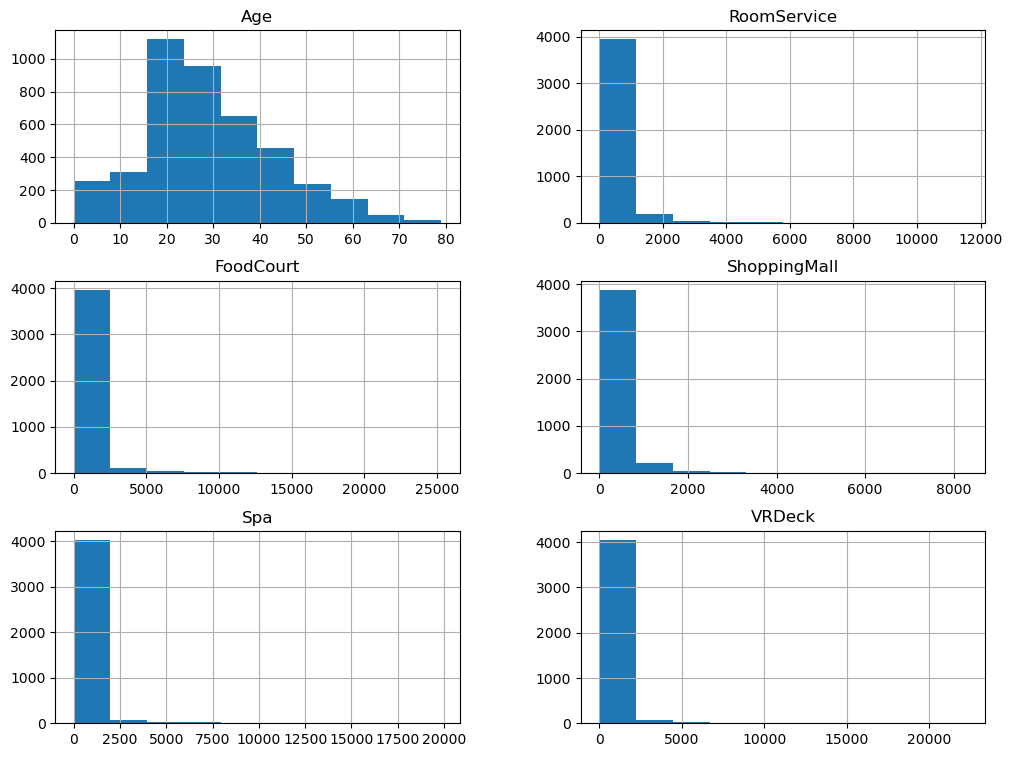

In [15]:
test_data.select_dtypes(include='number').hist(figsize=(12, 9))

## Categorical Features

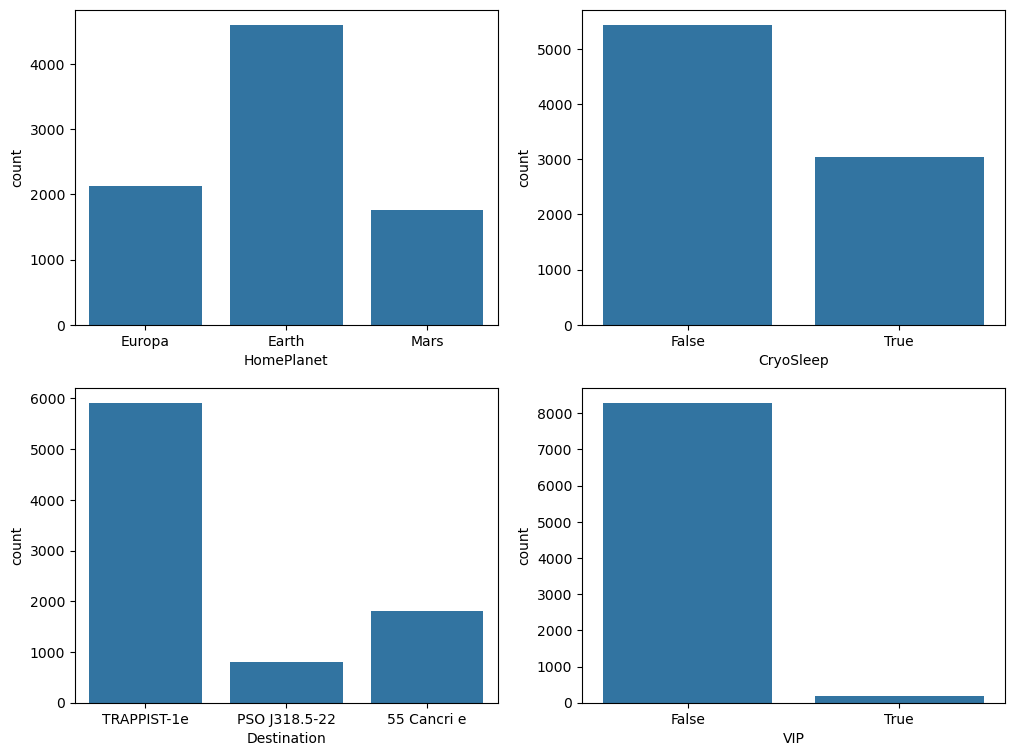

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

for i, f in enumerate(['HomePlanet', 'CryoSleep', 'Destination', 'VIP']):
    sns.countplot(data=train_data, x=f, ax=ax[i//2, i%2])

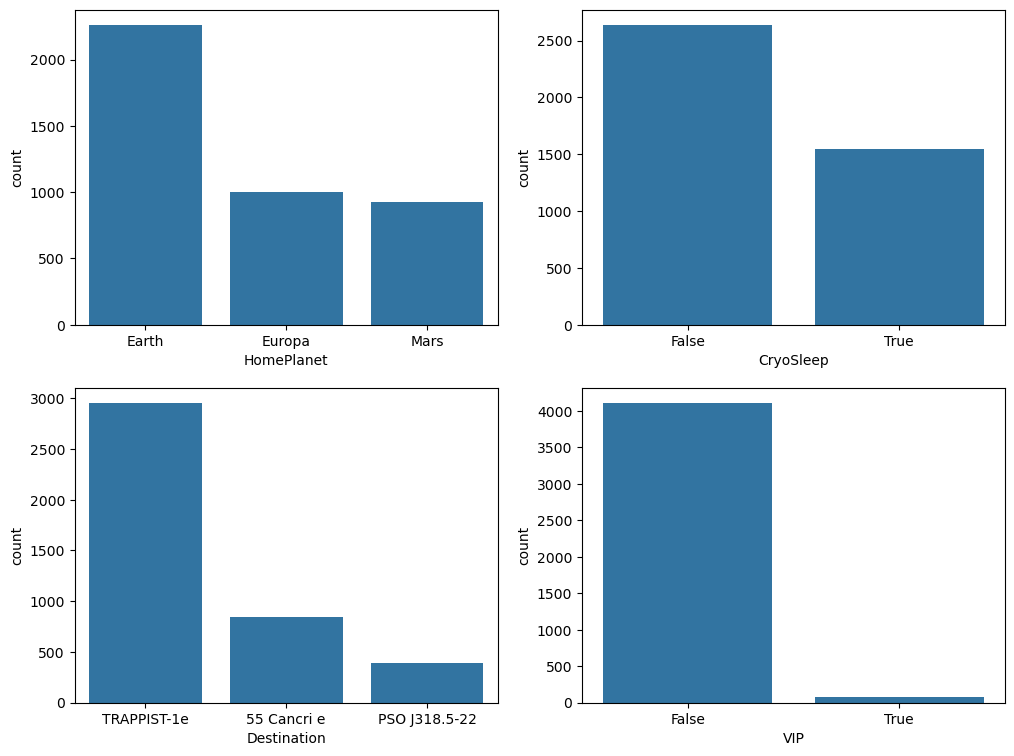

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

for i, f in enumerate(['HomePlanet', 'CryoSleep', 'Destination', 'VIP']):
    sns.countplot(data=test_data, x=f, ax=ax[i//2, i%2])

## Label

<Axes: xlabel='Transported', ylabel='count'>

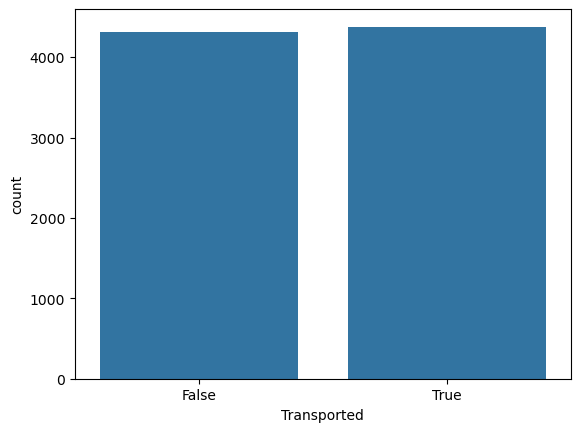

In [6]:
sns.countplot(data=train_data, x='Transported')

# Multivariate Analysis

In [3]:
feature = 'Transported'
train_data[feature] = train_data[feature].astype(int)

feature = 'CryoSleep'
train_data[feature] = train_data[feature].replace({'False': 0, 'True': 1}).astype('Int64')
test_data[feature] = test_data[feature].replace({'False': 0, 'True': 1}).astype('Int64')

feature = 'VIP'
train_data[feature] = train_data[feature].replace({'False': 0, 'True': 1}).astype('Int64')
test_data[feature] = test_data[feature].replace({'False': 0, 'True': 1}).astype('Int64')

## Heatmap

<Axes: >

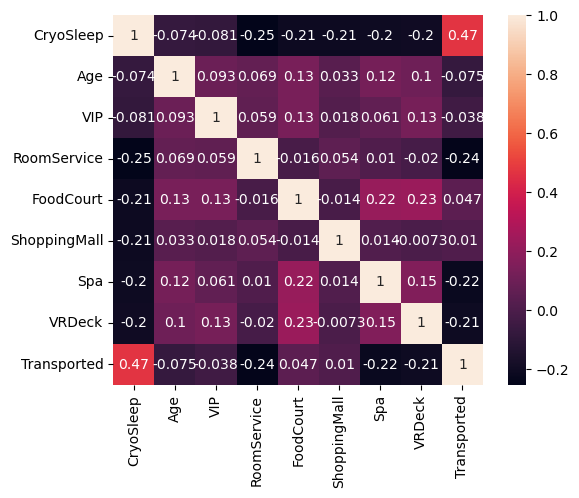

In [17]:
corr = train_data.select_dtypes(exclude='O').corr()
sns.heatmap(corr, square=True, annot=True)

## Transported

<Axes: xlabel='CryoSleep', ylabel='count'>

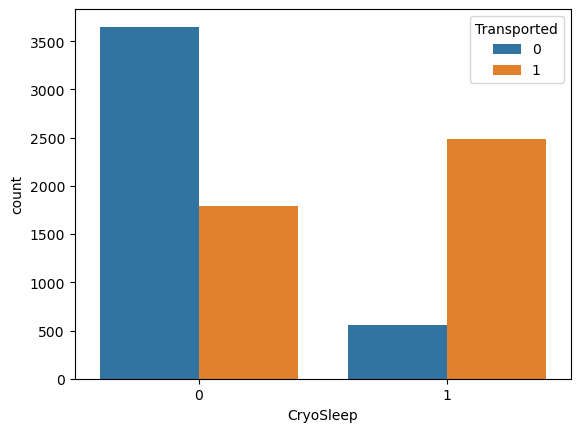

In [41]:
sns.countplot(data=train_data, x='CryoSleep', hue='Transported')

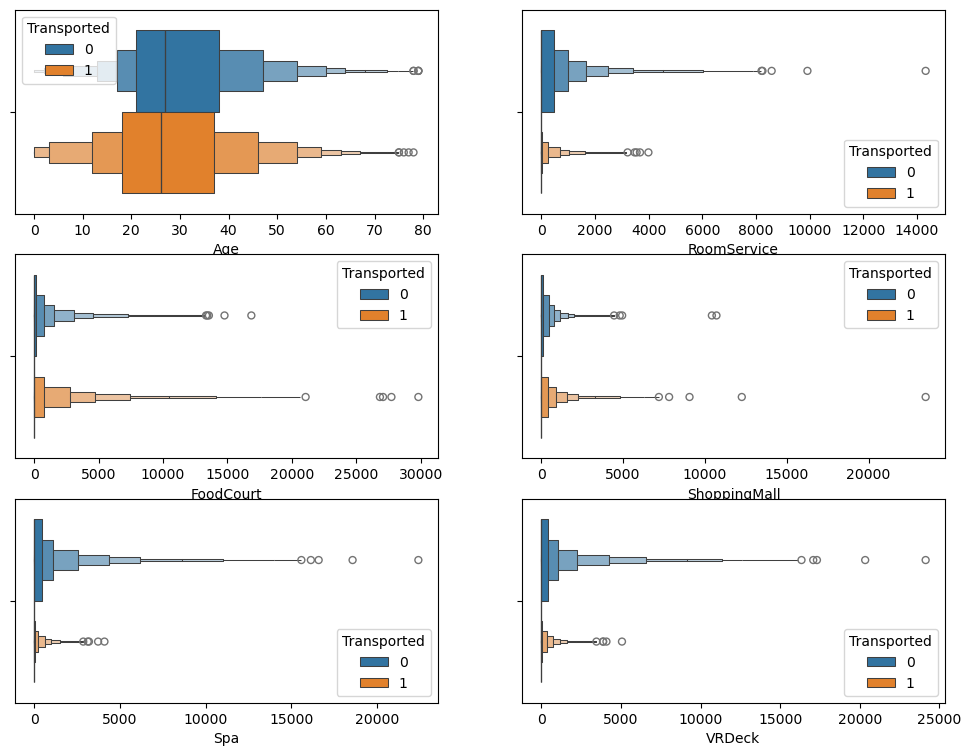

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

for i, f in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    sns.boxenplot(data=train_data, x=f, hue='Transported', ax=ax[i//2, i%2])

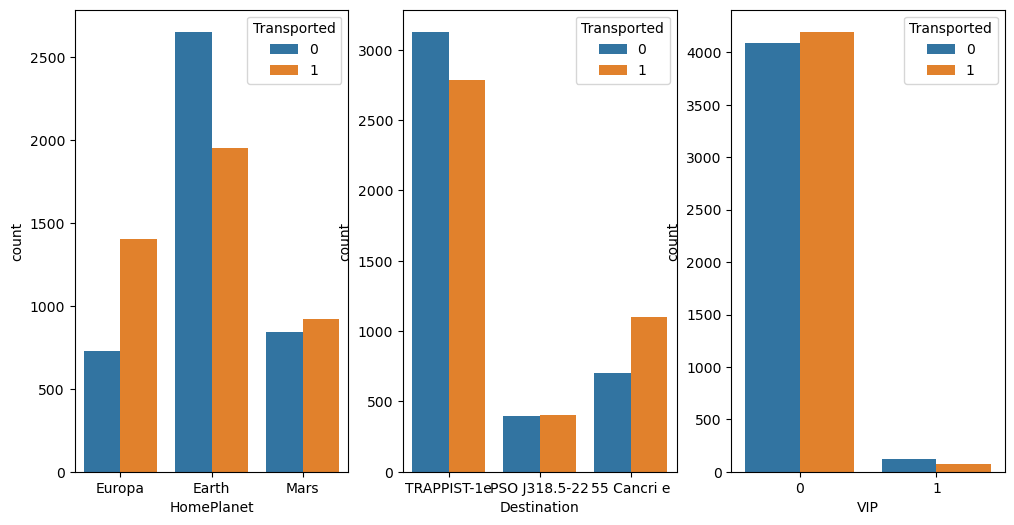

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, f in enumerate(['HomePlanet', 'Destination', 'VIP']):
    sns.countplot(data=train_data, x=f, hue='Transported', ax=ax[i])

## Outliers (possible)

In [13]:
train_data.loc[train_data['RoomService'] > 14000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,0,NaN,TRAPPIST-1e,27.0,0,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,0


In [14]:
train_data.loc[train_data['ShoppingMall'] > 20000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8415,8989_01,Europa,0,B/291/P,TRAPPIST-1e,17.0,0,0.0,366.0,23492.0,356.0,3.0,NaN,1


In [7]:
train_data.loc[train_data['Spa'] > 20000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5722,6064_01,Europa,0,C/186/P,55 Cancri e,68.0,0,125.0,13437.0,0.0,22408.0,17.0,Markar Radisiouss,0


## VIP

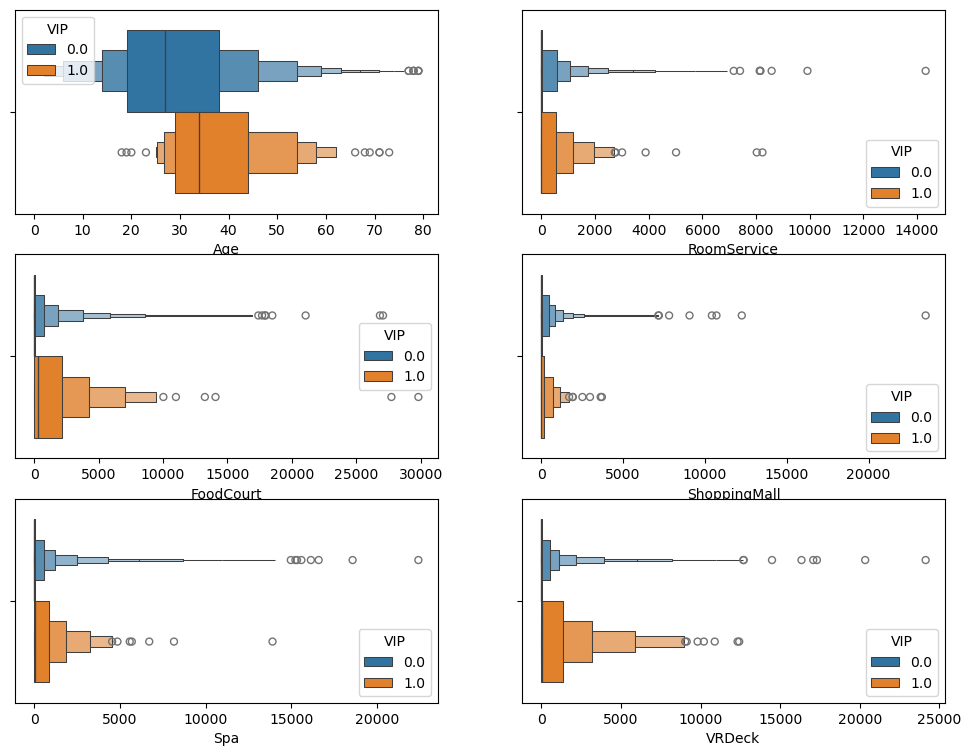

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

for i, f in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    sns.boxenplot(data=train_data, x=f, hue='VIP', ax=ax[i//2, i%2])

## Passenger Group

In [3]:
def getPassengerGroup(x):
    return x.split('_')[0]

In [4]:
train_data['PassengerGroup'] = train_data['PassengerId'].apply(getPassengerGroup)
test_data['PassengerGroup'] = test_data['PassengerId'].apply(getPassengerGroup)

In [13]:
train_data['PassengerGroup'].describe()

count     8693
unique    6217
top       4498
freq         8
Name: PassengerGroup, dtype: object

In [15]:
test_data['PassengerGroup'].describe()

count     4277
unique    3063
top       6332
freq         8
Name: PassengerGroup, dtype: object

In [16]:
train_data.select_dtypes(exclude='O').corrwith(train_data['PassengerGroup'])

CryoSleep      -0.005879
Age            -0.009439
VIP             0.014018
RoomService    -0.000346
FoodCourt      -0.009552
ShoppingMall    0.017397
Spa            -0.005211
VRDeck          0.015432
Transported     0.021491
dtype: float64

In [61]:
train_data[['Transported', 'PassengerGroup']].groupby(by='PassengerGroup').mean()

,Transported
PassengerGroup,
0001,0.000000
0002,1.000000
0003,0.000000
0004,1.000000
0005,1.000000
...,...
9275,0.666667
9276,0.000000
9278,0.000000


In [5]:
train_data[['Transported', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

Transported
0.000000       2868
1.000000       2552
0.500000        410
0.666667        139
0.333333         98
0.750000         35
0.600000         16
0.250000         16
0.800000         13
0.400000         10
0.833333          9
0.571429          9
0.428571          8
0.200000          7
0.714286          5
0.375000          5
0.166667          4
0.285714          4
0.857143          4
0.125000          2
0.625000          2
0.142857          1
Name: count, dtype: int64

In [60]:
train_data[['CryoSleep', 'PassengerGroup']].groupby(by='PassengerGroup').mean()

,CryoSleep
PassengerGroup,
0001,0.0
0002,0.0
0003,0.0
0004,0.0
0005,0.0
...,...
9275,0.0
9276,0.0
9278,1.0


In [9]:
test_data[['CryoSleep', 'PassengerGroup']].groupby(by='PassengerGroup').mean()

,CryoSleep
PassengerGroup,
0013,1.0
0018,0.0
0019,1.0
0021,0.0
0023,0.0
...,...
9266,0.5
9269,0.0
9271,1.0


In [6]:
train_data[['CryoSleep', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

CryoSleep
0.000000     3626
1.000000     1672
0.500000      412
0.333333      139
0.666667      113
0.250000       40
0.750000       18
0.400000       17
0.200000       12
0.600000       11
0.428571        9
0.571429        7
0.166667        6
0.285714        6
0.375000        5
0.800000        5
0.833333        3
0.142857        3
0.714286        2
0.857143        2
0.125000        1
Name: count, dtype: int64

In [10]:
test_data[['CryoSleep', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

CryoSleep
0.000000     1752
1.000000      844
0.500000      234
0.333333       69
0.666667       59
0.250000       11
0.750000        9
0.200000        7
0.600000        6
0.400000        6
0.285714        4
0.428571        4
0.800000        4
0.166667        3
0.375000        1
0.142857        1
0.714286        1
Name: count, dtype: int64

In [59]:
train_data[['VIP', 'PassengerGroup']].groupby(by='PassengerGroup').mean()

,VIP
PassengerGroup,
0001,0.0
0002,0.0
0003,0.5
0004,0.0
0005,0.0
...,...
9275,0.0
9276,1.0
9278,0.0


In [11]:
test_data[['VIP', 'PassengerGroup']].groupby(by='PassengerGroup').mean()

,VIP
PassengerGroup,
0013,0.0
0018,0.0
0019,0.0
0021,0.0
0023,0.0
...,...
9266,0.0
9269,0.0
9271,0.0


In [8]:
train_data[['VIP', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

VIP     
0.000000    5908
1.000000      89
0.500000      58
0.333333      21
0.250000      12
0.166667       6
0.200000       4
0.666667       2
0.142857       1
0.400000       1
Name: count, dtype: int64

In [7]:
test_data[['VIP', 'PassengerGroup']].groupby(by='PassengerGroup').mean().value_counts()

VIP     
0.000000    2934
1.000000      32
0.500000      21
0.333333      10
0.250000       7
0.200000       2
0.142857       1
Name: count, dtype: int64

In [24]:
train_data['PassengerGroup'].map(test_data['PassengerGroup'].value_counts()).value_counts()

Series([], Name: count, dtype: int64)

## Cabin

In [31]:
train_data[['CabinDeck', 'CabinNum', 'CabinSide']] = train_data['Cabin'].fillna('_/_/_').str.split('/', expand=True)
test_data[['CabinDeck', 'CabinNum', 'CabinSide']] = test_data['Cabin'].fillna('_/_/_').str.split('/', expand=True)

In [32]:
train_data['CabinDeck'].value_counts()

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
_     199
T       5
Name: count, dtype: int64

In [33]:
test_data['CabinDeck'].value_counts()

CabinDeck
F    1445
G    1222
E     447
B     362
C     355
D     242
_     100
A      98
T       6
Name: count, dtype: int64

In [49]:
train_data[['Transported', 'CabinDeck']].groupby(by='CabinDeck').mean()

,Transported
CabinDeck,
A,0.496094
B,0.734275
C,0.680054
D,0.433054
E,0.357306
F,0.439871
G,0.516217
T,0.200000
_,0.502513


In [50]:
train_data[['CryoSleep', 'CabinDeck']].groupby(by='CabinDeck').mean()

,CryoSleep
CabinDeck,
A,0.272
B,0.551316
C,0.406077
D,0.222222
E,0.196262
F,0.201761
G,0.540865
T,0.0
_,0.4375


In [51]:
test_data[['CryoSleep', 'CabinDeck']].groupby(by='CabinDeck').mean()

,CryoSleep
CabinDeck,
A,0.361702
B,0.531073
C,0.481375
D,0.271967
E,0.192661
F,0.21373
G,0.558528
T,0.0
_,0.360825


In [52]:
train_data[['VIP', 'CabinDeck']].groupby(by='CabinDeck').mean()

,VIP
CabinDeck,
A,0.14
B,0.054759
C,0.056319
D,0.066098
E,0.017422
F,0.010646
G,0.0
T,0.0
_,0.031088


In [53]:
test_data[['VIP', 'CabinDeck']].groupby(by='CabinDeck').mean()

,VIP
CabinDeck,
A,0.106383
B,0.045845
C,0.04058
D,0.042017
E,0.025057
F,0.008457
G,0.0
T,0.0
_,0.010526


In [30]:
train_data['CabinSide'].value_counts()

CabinSide
S    4288
P    4206
_     199
Name: count, dtype: int64

In [34]:
test_data['CabinSide'].value_counts()

CabinSide
S    2093
P    2084
_     100
Name: count, dtype: int64

In [54]:
train_data[['Transported', 'CabinSide']].groupby(by='CabinSide').mean()

,Transported
CabinSide,
P,0.451260
S,0.555037
_,0.502513


In [55]:
train_data[['CryoSleep', 'CabinSide']].groupby(by='CabinSide').mean()

,CryoSleep
CabinSide,
P,0.346934
S,0.365784
_,0.4375


In [56]:
test_data[['CryoSleep', 'CabinSide']].groupby(by='CabinSide').mean()

,CryoSleep
CabinSide,
P,0.368989
S,0.369449
_,0.360825


In [57]:
train_data[['VIP', 'CabinSide']].groupby(by='CabinSide').mean()

,VIP
CabinSide,
P,0.024799
S,0.02175
_,0.031088


In [58]:
test_data[['VIP', 'CabinSide']].groupby(by='CabinSide').mean()

,VIP
CabinSide,
P,0.019666
S,0.016058
_,0.010526


In [35]:
train_data['CabinNum'].describe()

count     8693
unique    1818
top          _
freq       199
Name: CabinNum, dtype: object

In [36]:
test_data['CabinNum'].describe()

count     4277
unique    1506
top          _
freq       100
Name: CabinNum, dtype: object

## Total Spending

<Axes: >

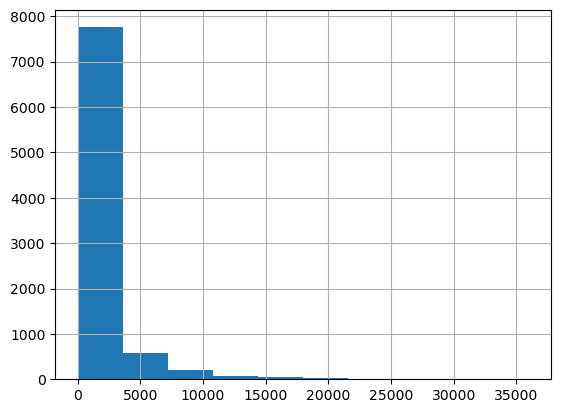

In [5]:
train_data['TotalSpending'] = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
train_data['TotalSpending'].hist()

<Axes: >

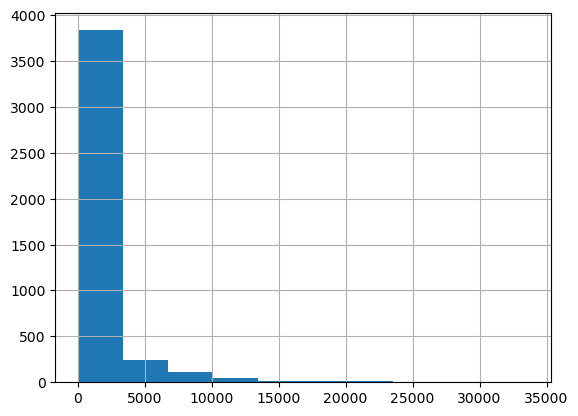

In [6]:
test_data['TotalSpending'] = test_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_data['TotalSpending'].hist()

In [7]:
train_data['TotalSpending'].corr(train_data['Transported'])

-0.19951424346781862

<Axes: xlabel='TotalSpending', ylabel='Count'>

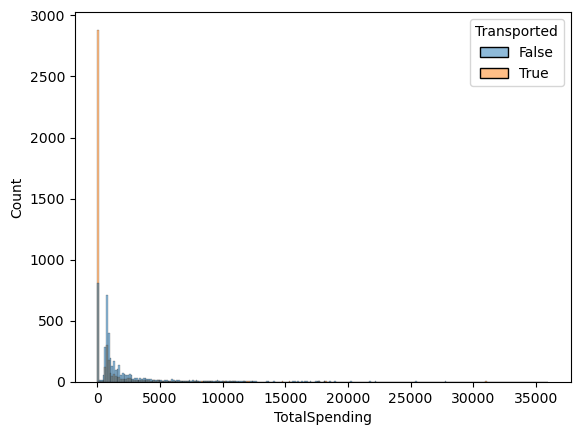

In [8]:
sns.histplot(train_data, x='TotalSpending', hue='Transported')

## Luxury Spending

<Axes: >

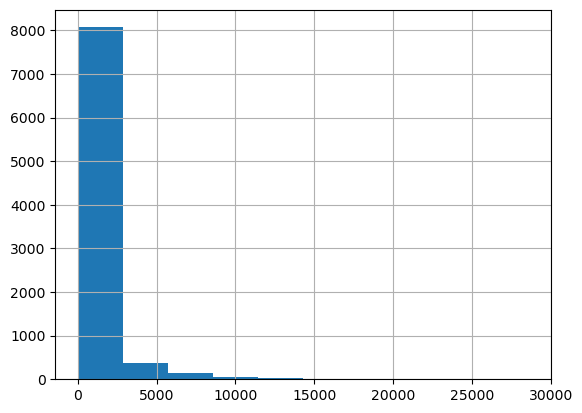

In [9]:
train_data['LuxurySpending'] = train_data[['RoomService', 'Spa', 'VRDeck']].sum(axis=1)
train_data['LuxurySpending'].hist()

<Axes: >

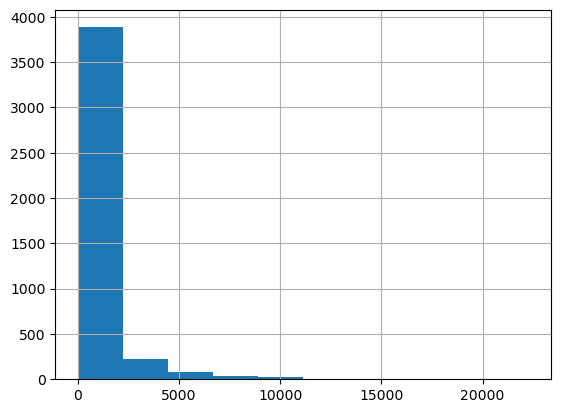

In [10]:
test_data['LuxurySpending'] = test_data[['RoomService', 'Spa', 'VRDeck']].sum(axis=1)
test_data['LuxurySpending'].hist()

In [11]:
train_data['LuxurySpending'].corr(train_data['Transported'])

-0.34824440142207336

<Axes: xlabel='LuxurySpending', ylabel='Count'>

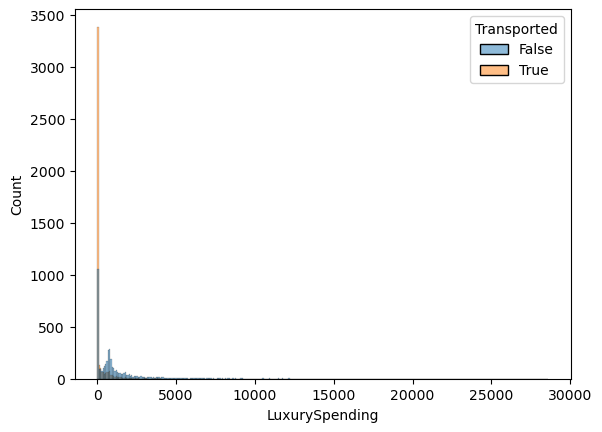

In [12]:
sns.histplot(train_data, x='LuxurySpending', hue='Transported')

In [17]:
train_data['LuxurySpending'].corr(train_data['CryoSleep'])

-0.33567719321982303

In [18]:
test_data['LuxurySpending'].corr(test_data['CryoSleep'])

-0.3365906192444151

In [19]:
train_data['LuxurySpending'].corr(train_data['VIP'])

0.135740460102602

In [20]:
test_data['LuxurySpending'].corr(test_data['VIP'])

0.15935126539877098

## Essential Spending

<Axes: >

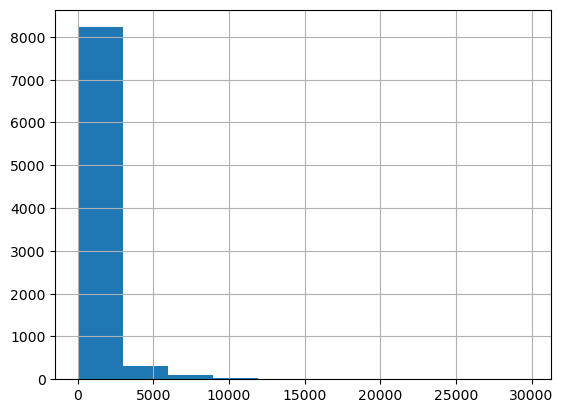

In [13]:
train_data['EssentialSpending'] = train_data[['FoodCourt', 'ShoppingMall']].sum(axis=1)
train_data['EssentialSpending'].hist()

<Axes: >

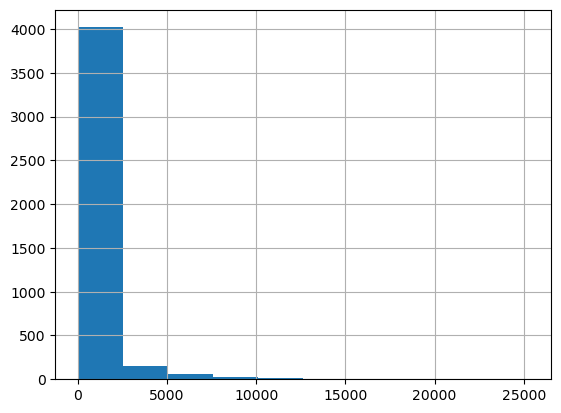

In [14]:
test_data['EssentialSpending'] = test_data[['FoodCourt', 'ShoppingMall']].sum(axis=1)
test_data['EssentialSpending'].hist()

In [15]:
train_data['EssentialSpending'].corr(train_data['Transported'])

0.04618878900194243

<Axes: xlabel='EssentialSpending', ylabel='Count'>

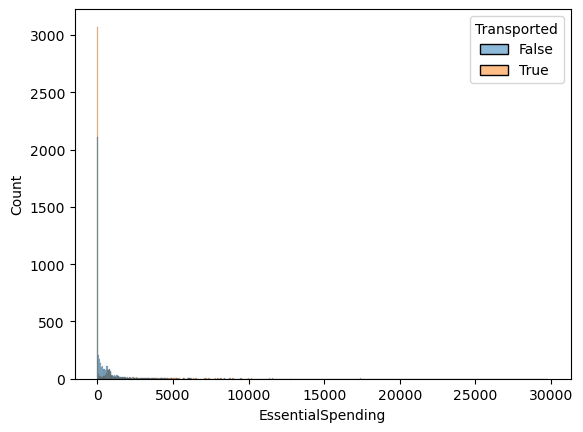

In [16]:
sns.histplot(train_data, x='EssentialSpending', hue='Transported')

In [21]:
train_data['EssentialSpending'].corr(train_data['CryoSleep'])

-0.2715346169961988

In [22]:
test_data['EssentialSpending'].corr(test_data['CryoSleep'])

-0.2831899265936655

In [23]:
train_data['EssentialSpending'].corr(train_data['VIP'])

0.12600398861107706

In [24]:
test_data['EssentialSpending'].corr(test_data['VIP'])

0.12905926516072205

## Has Spending

In [25]:
train_data['HasSpending'] = train_data['TotalSpending'].apply(lambda x: 1 if x > 0 else 0)
test_data['HasSpending'] = test_data['TotalSpending'].apply(lambda x: 1 if x > 0 else 0)

In [26]:
train_data['HasSpending'].value_counts()

HasSpending
1    5040
0    3653
Name: count, dtype: int64

In [27]:
test_data['HasSpending'].value_counts()

HasSpending
1    2473
0    1804
Name: count, dtype: int64

In [28]:
train_data['HasSpending'].corr(train_data['Transported'])

-0.48162848241270717

In [29]:
train_data['HasSpending'].corr(train_data['CryoSleep'])

-0.8791636968393322

In [30]:
test_data['HasSpending'].corr(test_data['CryoSleep'])

-0.8948587380259037

In [31]:
train_data['HasSpending'].corr(train_data['VIP'])

0.08747504944629259

In [32]:
test_data['HasSpending'].corr(test_data['VIP'])

0.08926433875106918